# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 625


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | ulanhot
Processing Record 3 of Set 1 | la passe
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | shendi
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | tazovsky
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | dumfries
Processing Record 11 of Set 1 | kirakira
Processing Record 12 of Set 1 | yanchep
Processing Record 13 of Set 1 | ancud
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | midvagur
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | olonkinbyen
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | viale
Processing Record 20 of Set 1 | neelankarai
Processing Record 21 of Set 1 | katsuura
Processing Record 22 of Set 1 | tosya
Processing Record 23 of Set 1 | okha


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

NameError: name 'city_data' is not defined

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,1.83,68,30,12.04,TF,1723270513
1,ulanhot,46.0833,122.0833,19.92,94,100,6.50,CN,1723270514
2,la passe,45.5549,-0.8967,18.69,91,40,3.21,FR,1723270515
3,puerto natales,-51.7236,-72.4875,2.17,98,100,0.87,CL,1723270516
4,albany,42.6001,-73.9662,21.92,76,55,0.45,US,1723270406


In [6]:
import os

In [7]:
output_dir = "output_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,1.83,68,30,12.04,TF,1723270513
1,ulanhot,46.0833,122.0833,19.92,94,100,6.50,CN,1723270514
2,la passe,45.5549,-0.8967,18.69,91,40,3.21,FR,1723270515
3,puerto natales,-51.7236,-72.4875,2.17,98,100,0.87,CL,1723270516
4,albany,42.6001,-73.9662,21.92,76,55,0.45,US,1723270406


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

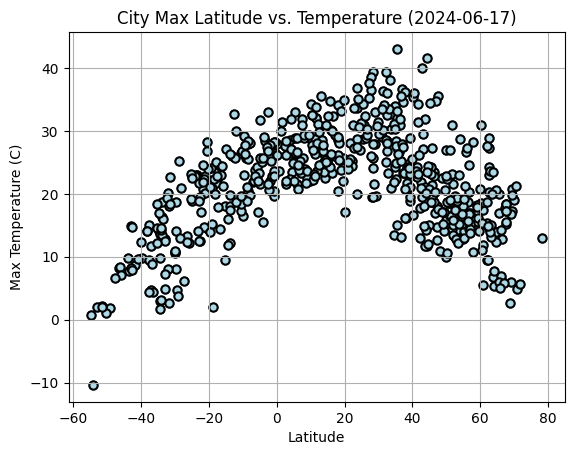

<Figure size 1000x800 with 0 Axes>

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])
plt.grid(True)

# Incorporate the other graph properties
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], color='lightblue', edgecolor='black', linewidth=1.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2024-06-17)")
plt.figure(figsize=(10, 8))

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

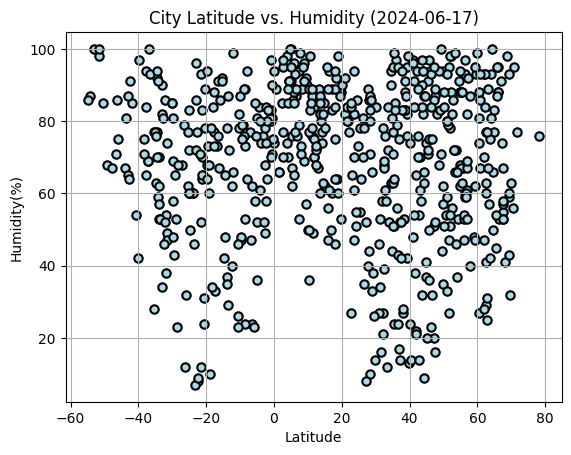

<Figure size 1000x800 with 0 Axes>

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.grid(True)
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], color='lightblue', edgecolor='black', linewidth=1.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("City Latitude vs. Humidity (2024-06-17)")
plt.figure(figsize=(10, 8))

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

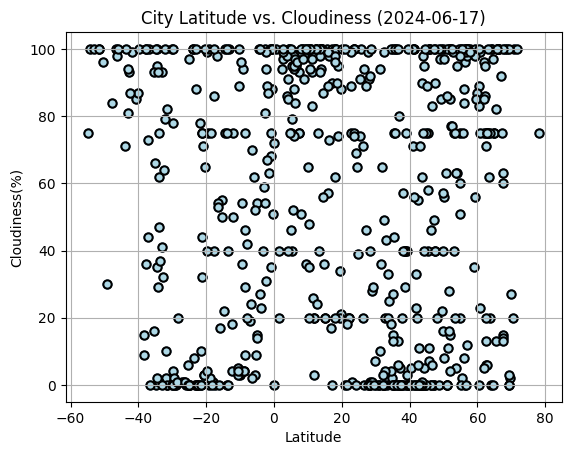

<Figure size 1000x800 with 0 Axes>

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.grid(True)
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], color='lightblue', edgecolor='black', linewidth=1.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("City Latitude vs. Cloudiness (2024-06-17)")
plt.figure(figsize=(10, 8))

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

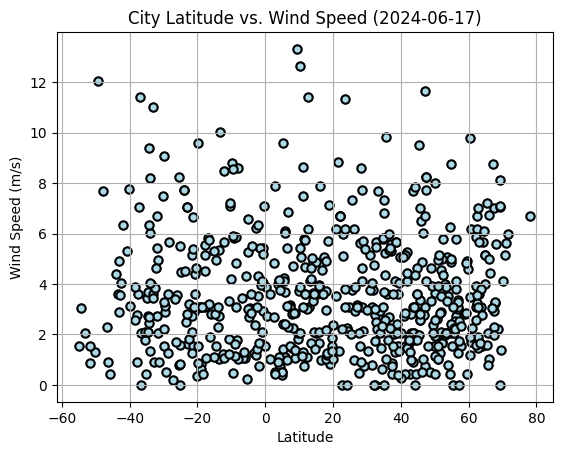

<Figure size 1000x800 with 0 Axes>

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.grid(True)
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], color='lightblue', edgecolor='black', linewidth=1.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2024-06-17)")
plt.figure(figsize=(10, 8))

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def linear_regress(x, y, eqn_coordinates):
    r = st.pearsonr(x, y)
    print(f"The r-value is: {r[0]}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ulanhot,46.0833,122.0833,19.92,94,100,6.50,CN,1723270514
2,la passe,45.5549,-0.8967,18.69,91,40,3.21,FR,1723270515
4,albany,42.6001,-73.9662,21.92,76,55,0.45,US,1723270406
5,shendi,16.6915,33.4341,32.41,50,17,4.54,SD,1723270518
7,tazovsky,67.4667,78.7000,15.24,55,15,7.01,RU,1723270520


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,1.83,68,30,12.04,TF,1723270513
3,puerto natales,-51.7236,-72.4875,2.17,98,100,0.87,CL,1723270516
6,waitangi,-43.9535,-176.5597,9.88,67,71,4.40,NZ,1723270519
8,adamstown,-25.0660,-130.1015,18.87,72,97,5.50,PN,1723270522
10,kirakira,-10.4544,161.9205,26.48,82,89,7.09,SB,1723270524


###  Temperature vs. Latitude Linear Regression Plot

In [2]:
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [9]:
from scipy.stats import linregress

In [6]:
from scipy.stats import pearsonr

In [7]:
import streamlit as st

In [3]:
# Linear regression on Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Max Temp"], (10, -30))

NameError: name 'linear_regress' is not defined

The r^2-value is: 0.6720220238897325


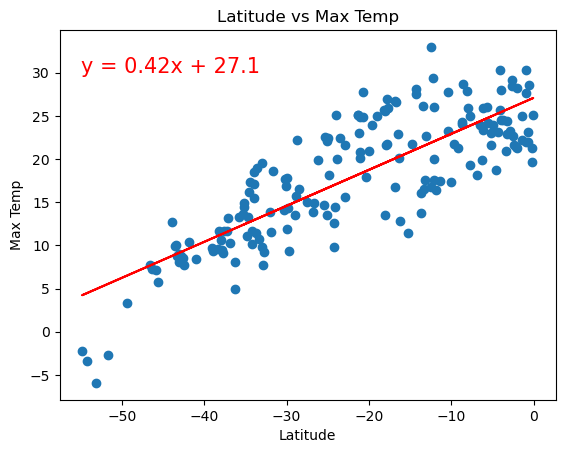

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.007659599322853922


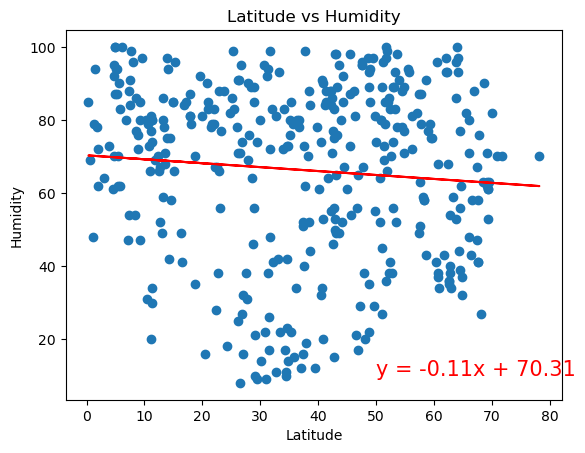

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.00014367159540169783


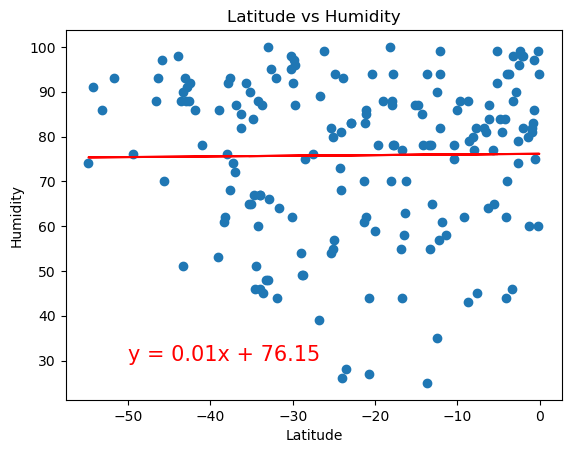

In [23]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.006456908379763574


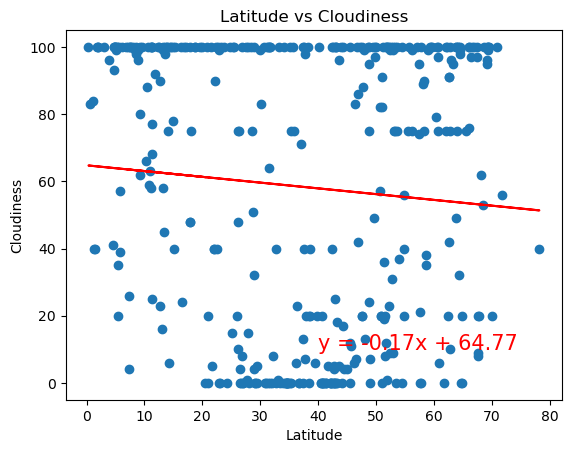

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.018616831531634456


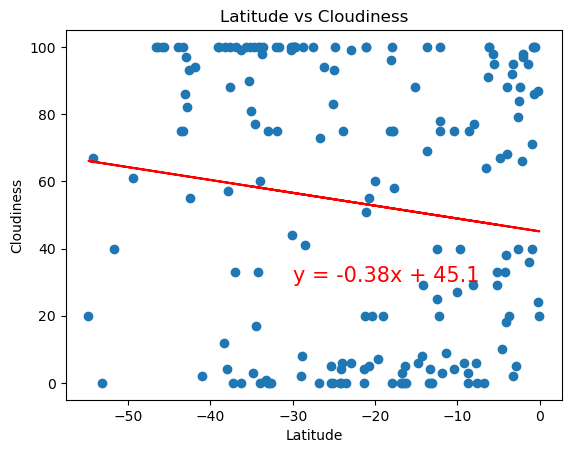

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0017236249523139959


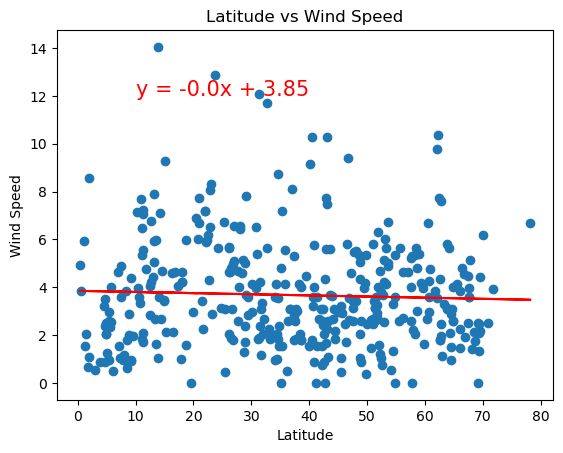

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.06495869418886388


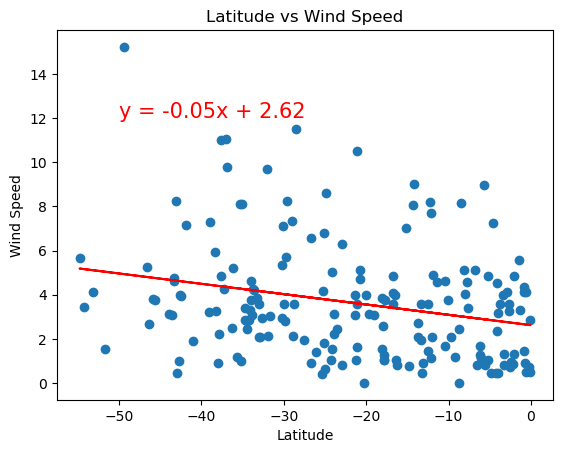

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE